# Task 4
## a)

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from functools import partial



def SIR(_, y, a, b):
    s, i, r = y
    s_prime = -b * s * i
    i_prime = b * s * i - a * i
    r_prime = a * i
    return np.array([s_prime, i_prime, r_prime])





y0 = np.array([0.99, 0.01, 0.0])
a = 0.03
b = 0.33
SIR_bound = partial(SIR, a=a, b=b)

result = SIR_bound(0,y0)
print(result)



[-0.003267  0.002967  0.0003  ]


## b)

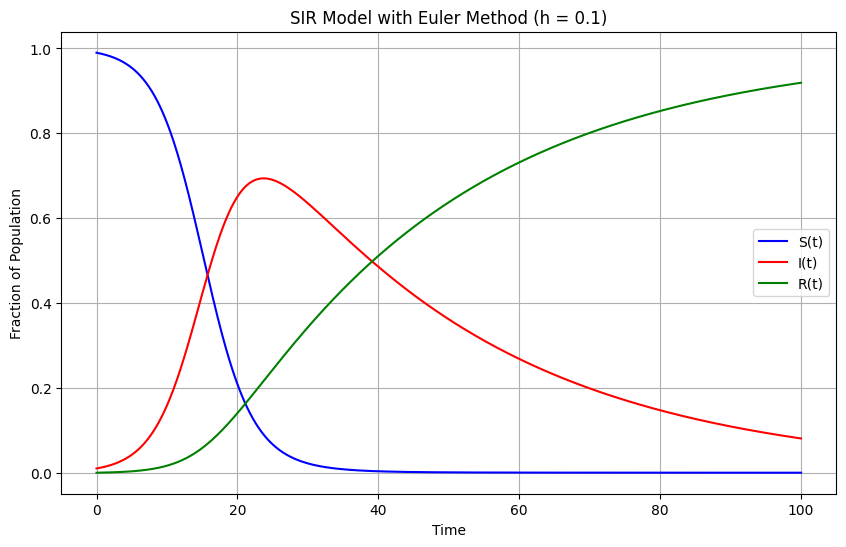

In [46]:
def Euler(t, y, f, h):
    return y + h * f(t, y)


def use_method(f, method, y0, h, t_end):
    t_vals = np.arange(0, t_end + h, h)
    y_vals = np.zeros((len(t_vals), len(y0)))
    y_vals[0] = y0

    for i in range(1, len(t_vals)):
        y_vals[i] = method(
            t_vals[i - 1],
            y_vals[i - 1],
            f,
            h,
        )

    return t_vals, y_vals

h = 0.1
t_end = 100

y = y0

t_vals, y_euler = use_method(SIR_bound, Euler, y0, h, t_end)


plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_euler[:, 0], label='S(t)', color='blue')
plt.plot(t_vals, y_euler[:, 1], label='I(t)', color='red')
plt.plot(t_vals, y_euler[:, 2], label='R(t)', color='green')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIR Model with Euler Method (h = 0.1)')
plt.legend()
plt.grid()
plt.show()

## c)

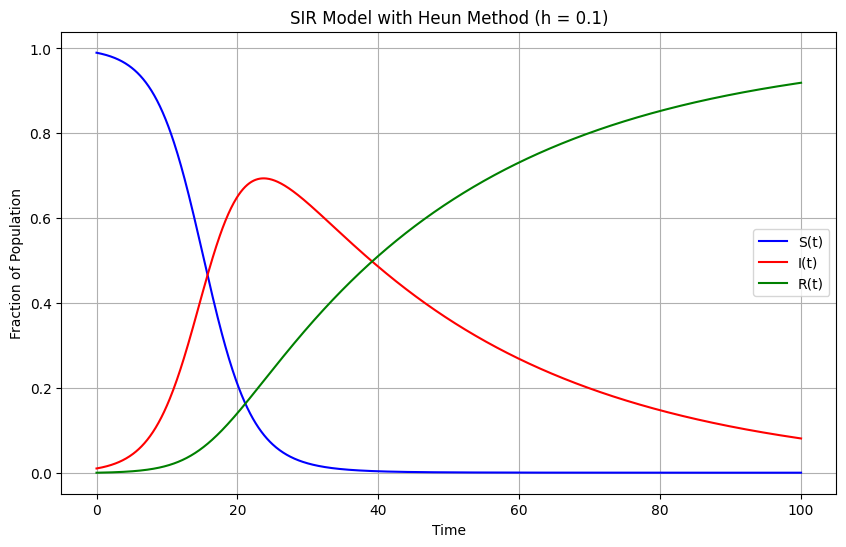

In [47]:

def Heun(t, y, f, h):

    y_predict = y + h * f(t, y)

    y_correct = y + (h / 2) * (f(t, y) + f(t, y_predict))

    return y_correct




t_vals, y_heun = use_method(SIR_bound, Heun, y0, h, t_end)

plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_euler[:, 0], label='S(t)', color='blue')
plt.plot(t_vals, y_euler[:, 1], label='I(t)', color='red')
plt.plot(t_vals, y_euler[:, 2], label='R(t)', color='green')
plt.xlabel('Time')
plt.ylabel('Fraction of Population')
plt.title('SIR Model with Heun Method (h = 0.1)')
plt.legend()
plt.grid()
plt.show()

## d)

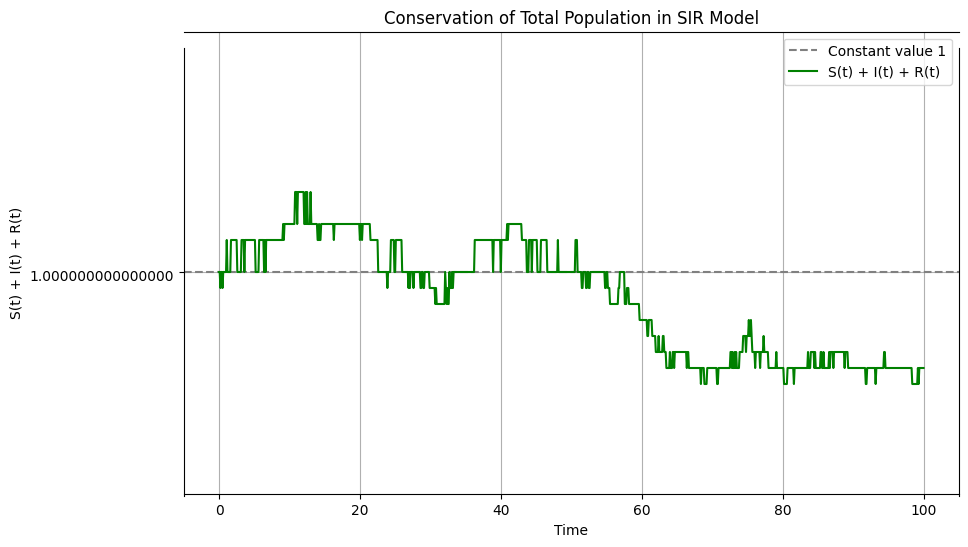

9.992007221626409e-16


In [48]:

total_vals = y_heun[:, 0] + y_heun[:, 1] + y_heun[:, 2]

plt.figure(figsize=(10, 6))
plt.axhline(y=1, color='gray', linestyle='--', label='Constant value 1')
plt.plot(t_vals, total_vals, label='S(t) + I(t) + R(t)', color='green')
plt.xlabel('Time')
plt.ylabel('S(t) + I(t) + R(t)')
plt.title('Conservation of Total Population in SIR Model')
plt.ylim(1 - 2e-15, 1 + 2e-15)
plt.legend()
plt.grid()
plt.show()

deviation = np.max(np.abs(total_vals - 1))
print(deviation)

## e)

---- h: 1.0 ----
Max error S: 0.09881633515257615
Max error I: 0.07988873403041186
Max error R: 0.032629816880066276
---- h: 0.1 ----
Max error S: 0.010927035264773344
Max error I: 0.008885250555826618
Max error R: 0.003480192936776899
---- h: 0.01 ----
Max error S: 0.0011040828164514682
Max error I: 0.000897925013392975
Max error R: 0.0003506241984195524


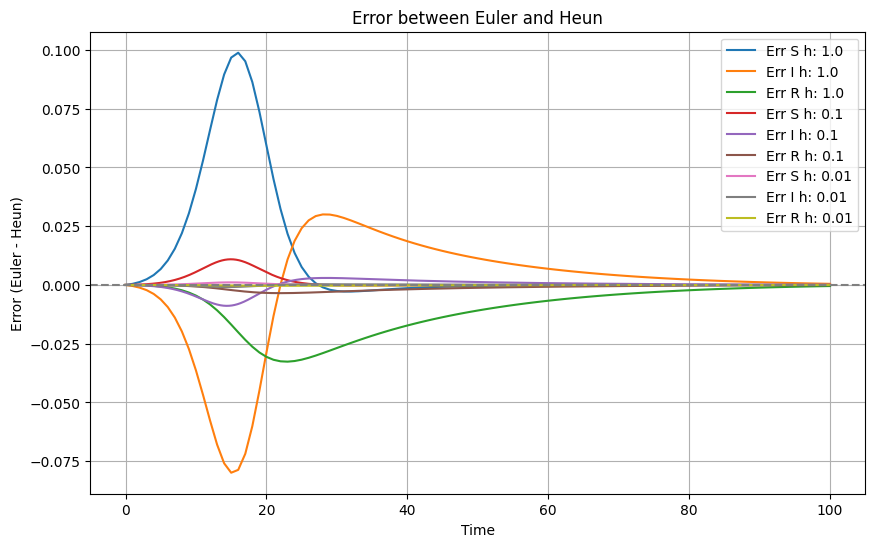

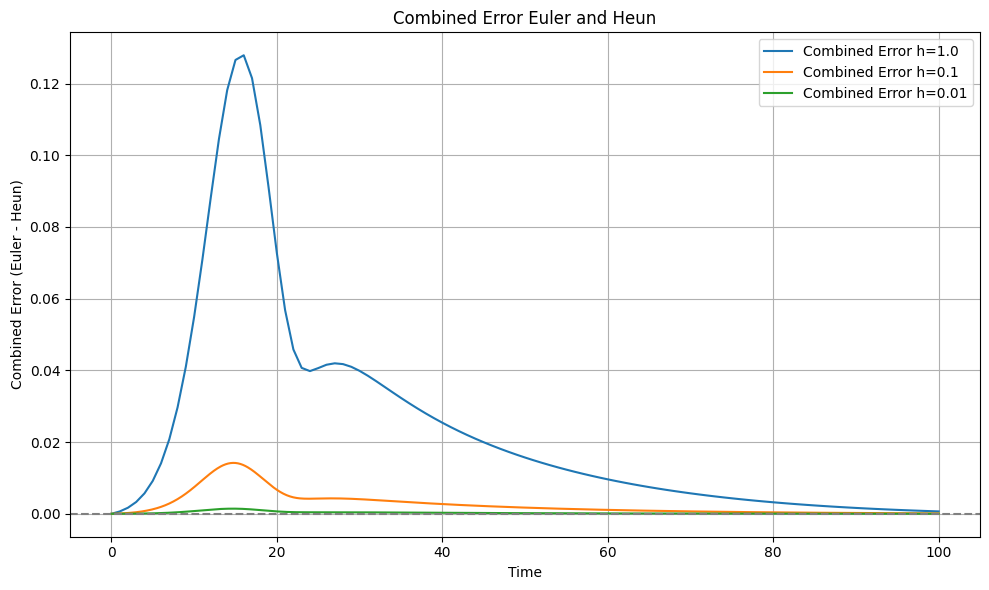

In [49]:

h_vals = [1.0, 0.1, 0.01]

individual_errors = {}
combined_errors = {}
t_vals_h = {}

for h_val in h_vals:
    t_vals, y_heun = use_method(SIR_bound, Heun, y0, h_val, t_end)
    t_vals, y_euler = use_method(SIR_bound, Euler, y0, h_val, t_end)

    error_S = y_euler[:, 0] - y_heun[:, 0]
    error_I = y_euler[:, 1] - y_heun[:, 1]
    error_R = y_euler[:, 2] - y_heun[:, 2]

    individual_errors[h_val] = (error_S, error_I, error_R)
    t_vals_h[h_val] = t_vals

    combined_error = np.sqrt(error_S**2 + error_I**2 + error_R**2)
    combined_errors[h_val] = combined_error

    max_error_S = np.max(np.abs(error_S))
    max_error_I = np.max(np.abs(error_I))
    max_error_R = np.max(np.abs(error_R))

    print(f'---- h: {h_val} ----')
    print(f'Max error S: {max_error_S}')
    print(f'Max error I: {max_error_I}')
    print(f'Max error R: {max_error_R}')

plt.figure(figsize=(10, 6))

for h_val, (error_S, error_I, error_R) in individual_errors.items():
    plt.plot(t_vals_h[h_val], error_S, label=f'Err S h: {h_val}')
    plt.plot(t_vals_h[h_val], error_I, label=f'Err I h: {h_val}')
    plt.plot(t_vals_h[h_val], error_R, label=f'Err R h: {h_val}')

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Error (Euler - Heun)')
plt.title('Error between Euler and Heun')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))

for h_val, combined_error in combined_errors.items():
    plt.plot(t_vals_h[h_val],
             combined_error,
             label=f'Combined Error h={h_val}')

plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Combined Error (Euler - Heun)')
plt.title('Combined Error Euler and Heun')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Task 5
## a)

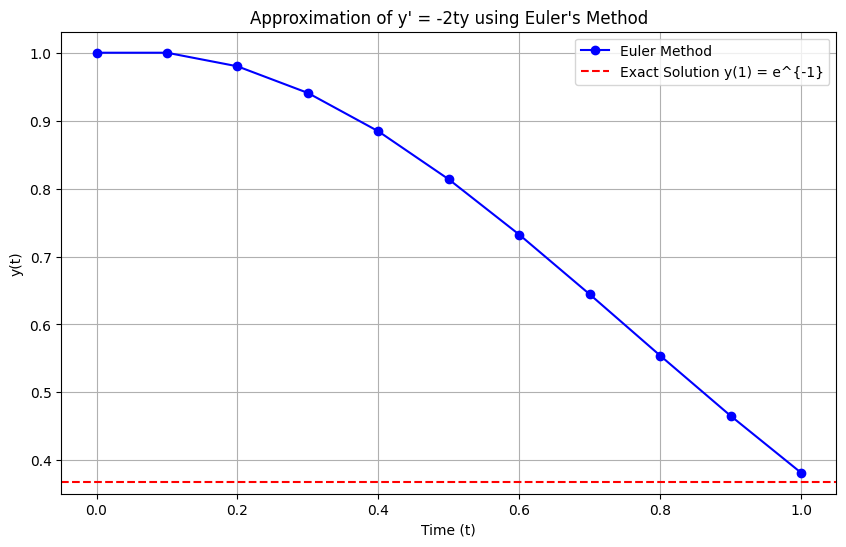

Approximation of y(1) using Euler's method: [0.38170668]


In [50]:
def f(t, y):
    return -2 * t * y


y0 = np.array([1.0])

h = 0.1
t_end = 1

t_vals_ode, y_euler_ode = use_method(f, Euler, y0, h, t_end)

plt.figure(figsize=(10, 6))
plt.plot(t_vals_ode,
         y_euler_ode,
         label='Euler Method',
         color='blue',
         marker='o')
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title("Approximation of y' = -2ty using Euler's Method")
plt.axhline(y=np.exp(-1**2),
            color='red',
            linestyle='--',
            label='Exact Solution y(1) = e^{-1}')
plt.legend()
plt.grid()
plt.show()

print(f"Approximation of y(1) using Euler's method: {y_euler_ode[-1]}")


## b)

In [51]:
t_vals_ode, y_heun_ode = use_method(f, Heun, y0, h, t_end)

print(f"Approximation of y(1) using Heun's method: {y_heun_ode[-1]}")

Approximation of y(1) using Heun's method: [0.40780171]


## c)

In [54]:

def f_prime(t, y):
    return -2 * y + 4 * (t**2) * y


def Taylor2(t, y, f, h, f_prime):
    return y + h * f(t, y) + (h**2 / 2) * f_prime(t, y)


Taylor2_f = partial(Taylor2, f_prime=f_prime)

t_vals_ode, y_taylor_ode = use_method(f, Taylor2_f, y0, h, t_end)



print(f"Approximation of y(1) using Taylors's method: {y_taylor_ode[-1]}")


Approximation of y(1) using Taylors's method: [0.36785476]



## d)

In [55]:


def compute_global_error(f, method, y0, h, t_end):
    t_vals, y_vals = use_method(f, method, y0, h, t_end)
    exact_vals = np.exp(-t_vals**2)
    global_error = np.max(np.abs(exact_vals - y_vals.flatten()))
    return global_error


def compute_convergence_order(error_h1, error_h2, h1, h2):
    return np.log(error_h1 / error_h2) / np.log(h1 / h2)


h_vals = [1.0, 0.1, 0.01]
errors = {}
combined_errors = {}
t_vals_h = {}

h1, h2 = h_vals[:2]

error_euler_h1 = compute_global_error(f, Euler, y0, h1, t_end)
error_euler_h2 = compute_global_error(f, Euler, y0, h2, t_end)
error_heun_h1 = compute_global_error(f, Heun, y0, h1, t_end)
error_heun_h2 = compute_global_error(f, Heun, y0, h2, t_end)
error_taylor_h1 = compute_global_error(f, Taylor2_f, y0, h1, t_end)
error_taylor_h2 = compute_global_error(f, Taylor2_f, y0, h2, t_end)

p_euler = compute_convergence_order(error_euler_h1, error_euler_h2, h1, h2)
p_heun = compute_convergence_order(error_heun_h1, error_heun_h2, h1, h2)
p_taylor = compute_convergence_order(error_taylor_h1, error_taylor_h2, h1, h2)

print(
    f"Global error Euler  h1: {error_euler_h1}, h2: {error_euler_h2}, p: {p_euler}"
)
print(
    f"Global error Heun h1: {error_heun_h1}, h2: {error_heun_h2}, p: {p_heun}")
print(
    f"Global error for Second-order Taylor h1: {error_taylor_h1}, h2: {error_taylor_h2}, p: {p_taylor}"
)


Global error Euler  h1: 0.6321205588285577, h2: 0.03480305692859509, p: 1.2591825234683536
Global error Heun h1: 0.6321205588285577, h2: 0.04483807388323613, p: 1.1491529671104932
Global error for Second-order Taylor h1: 0.36787944117144233, h2: 0.002760755692250483, p: 2.1246775418095267


## e)

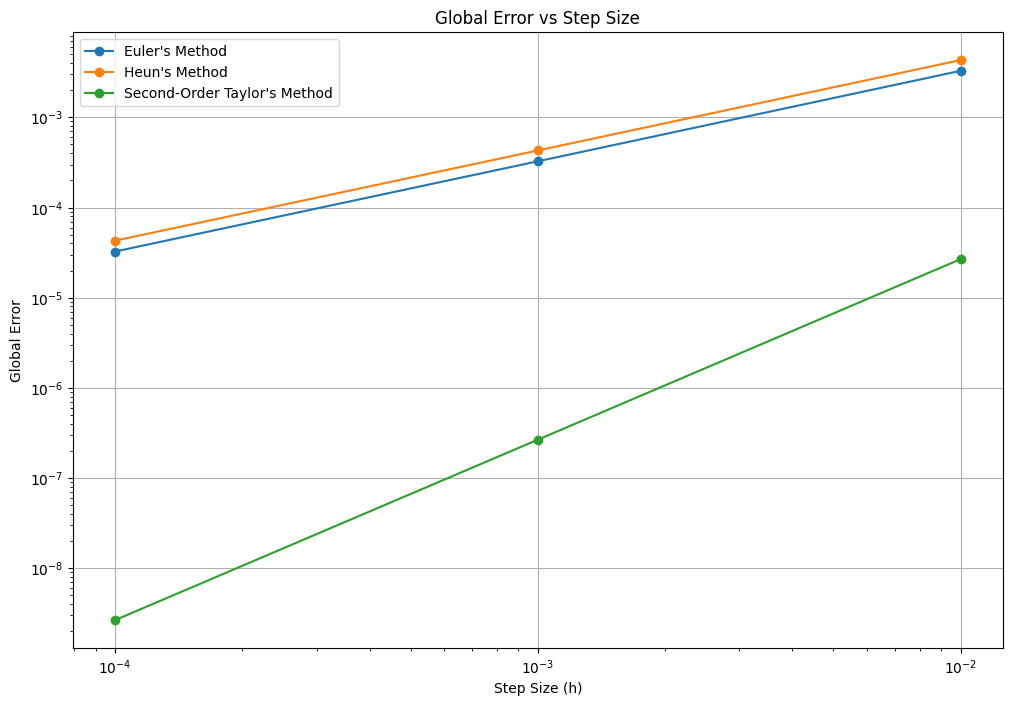

In [56]:

h_vals = [1e-2, 1e-3, 1e-4]

errors_euler = []
errors_heun = []
errors_taylor2 = []

for h in h_vals:
    max_error_euler = compute_global_error(f, Euler, y0, h, t_end)
    max_error_heun = compute_global_error(f, Heun, y0, h, t_end)
    max_error_taylor2 = compute_global_error(f, Taylor2_f, y0, h, t_end)

    errors_euler.append(max_error_euler)
    errors_heun.append(max_error_heun)
    errors_taylor2.append(max_error_taylor2)

plt.figure(figsize=(12, 8))
plt.loglog(h_vals, errors_euler, marker='o', label="Euler's Method")
plt.loglog(h_vals, errors_heun, marker='o', label="Heun's Method")
plt.loglog(h_vals,
           errors_taylor2,
           marker='o',
           label="Second-Order Taylor's Method")

plt.xlabel('Step Size (h)')
plt.ylabel('Global Error')
plt.title('Global Error vs Step Size')
plt.legend()
plt.grid()
plt.show()